In [1]:
!pip install bagpy

     |████████████████████████████████| 6.4 MB 5.1 MB/s 
     |████████████████████████████████| 1.2 MB 14.5 MB/s 
     |████████████████████████████████| 603 kB 8.8 MB/s 
     |████████████████████████████████| 1.1 MB 33.6 MB/s 
     |████████████████████████████████| 2.9 MB 29.2 MB/s 
     |████████████████████████████████| 216 kB 37.8 MB/s 
     |████████████████████████████████| 90 kB 5.3 MB/s 
     |████████████████████████████████| 2.8 MB 28.3 MB/s 
     |████████████████████████████████| 2.0 MB 16.3 MB/s 
     |████████████████████████████████| 90 kB 5.6 MB/s 
     |████████████████████████████████| 121 kB 39.5 MB/s 
     |████████████████████████████████| 84 kB 2.3 MB/s 
     |████████████████████████████████| 100 kB 5.2 MB/s 
     |████████████████████████████████| 76 kB 4.2 MB/s 
     |████████████████████████████████| 100 kB 9.4 MB/s 
     |████████████████████████████████| 51 kB 5.6 MB/s 
     |████████████████████████████████| 242 kB 36.1 MB/s 
     |██████████████████████

In [2]:
pip install squaternion

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.interpolate import splprep, splev
from bagpy import bagreader
import seaborn as sea
import pandas as pd
from scipy.integrate import cumtrapz
from squaternion import Quaternion

In [5]:
moving_bag = bagreader('/content/drive/MyDrive/Lab 4/moving.bag')
stationary_bag = bagreader('/content/drive/MyDrive/Lab 4/stationary.bag')

[INFO]  Data folder /content/drive/MyDrive/Lab 4/moving already exists. Not creating.
[INFO]  Data folder /content/drive/MyDrive/Lab 4/stationary already exists. Not creating.


In [6]:
gps_msg = moving_bag.message_by_topic('/gps_pub')
gps_df = pd.read_csv(gps_msg)
imu_msg = moving_bag.message_by_topic('/imu')
imu_df = pd.read_csv(imu_msg)
mag_msg = moving_bag.message_by_topic('/magnetometer')
mag_df = pd.read_csv(mag_msg)

# GPS data

In [7]:
gps_df

Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0     1.646329e+09         474         1646328748           246570825   
1     1.646329e+09         475         1646328749           247151136   
2     1.646329e+09         476         1646328750           240539073   
3     1.646329e+09         477         1646328751           247553110   
4     1.646329e+09         478         1646328752           246820211   
...            ...         ...                ...                 ...   
1037  1.646330e+09        1511         1646329785           205945491   
1038  1.646330e+09        1512         1646329786           207741975   
1039  1.646330e+09        1513         1646329787           208477973   
1040  1.646330e+09        1514         1646329788           207719326   
1041  1.646330e+09        1515         1646329789           208354473   

      header.frame_id   latitude  longitude  altitude    utm_easting  \
0                 NaN  42.337485 -71.089701      14.0  327849.791083   
1                 NaN  42.337485 -71.089701      14.0  327849.791083   
2                 NaN  42.337485 -71.089701      14.0  327849.791083   
3                 NaN  42.337485 -71.089701      14.0  327849.791083   
4                 NaN  42.337485 -71.089701      14.0  327849.791083   
...               ...        ...        ...       ...            ...   
1037              NaN  42.337532 -71.089751      19.0  327845.799062   
1038              NaN  42.337532 -71.089751      19.0  327845.799062   
1039              NaN  42.337532 -71.089751      19.0  327845.799062   
1040              NaN  42.337532 -71.089751      19.0  327845.799062   
1041              NaN  42.337532 -71.089751      19.0  327845.799062   

      utm_northing  zone letter  
0     4.689363e+06    19      T  
1     4.689363e+06    19      T  
2     4.689363e+06    19      T  
3     4.689363e+06    19      T  
4     4.689363e+06    19      T  
...            ...   ...    ...  
1037  4.689368e+06    19      T  
1038  4.689368e+06    19      T  
1039  4.689368e+06    19      T  
1040  4.689368e+06    19      T  
1041  4.689368e+06    19      T  

[1042 rows x 12 columns]

In [8]:
utm_east = np.array(gps_df['utm_easting'])
utm_north = np.array(gps_df['utm_northing'])


In [9]:
utm_east.shape

(1042,)

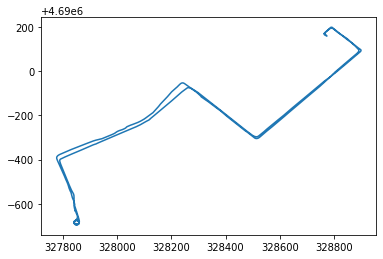

In [10]:
plt.plot(utm_east,utm_north)

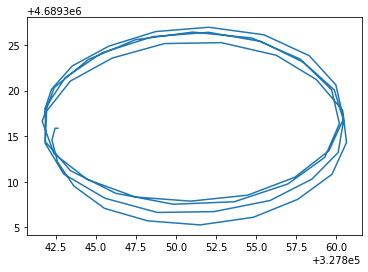

In [11]:
plt.plot(utm_east[30:120],utm_north[30:120])

# Magnetometer Analysis

## circle data analysis for hard and soft iron

In [12]:
mag_circle_df = mag_df[1500:4000]


In [13]:
mag_circle_df

Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
1500  1.646329e+09       26141                  0                   0   
1501  1.646329e+09       26142                  0                   0   
1502  1.646329e+09       26143                  0                   0   
1503  1.646329e+09       26144                  0                   0   
1504  1.646329e+09       26145                  0                   0   
...            ...         ...                ...                 ...   
3995  1.646329e+09       28636                  0                   0   
3996  1.646329e+09       28637                  0                   0   
3997  1.646329e+09       28638                  0                   0   
3998  1.646329e+09       28639                  0                   0   
3999  1.646329e+09       28640                  0                   0   

      header.frame_id  magnetic_field.x  magnetic_field.y  magnetic_field.z  \
1500              NaN          0.000020         -0.000011          0.000025   
1501              NaN          0.000020         -0.000011          0.000025   
1502              NaN          0.000020         -0.000011          0.000025   
1503              NaN          0.000020         -0.000011          0.000025   
1504              NaN          0.000020         -0.000011          0.000025   
...               ...               ...               ...               ...   
3995              NaN          0.000021         -0.000010          0.000026   
3996              NaN          0.000021         -0.000010          0.000026   
3997              NaN          0.000021         -0.000010          0.000026   
3998              NaN          0.000021         -0.000010          0.000026   
3999              NaN          0.000021         -0.000010          0.000026   

      magnetic_field_covariance_0  magnetic_field_covariance_1  \
1500                          0.0                          0.0   
1501                          0.0                          0.0   
1502                          0.0                          0.0   
1503                          0.0                          0.0   
1504                          0.0                          0.0   
...                           ...                          ...   
3995                          0.0                          0.0   
3996                          0.0                          0.0   
3997                          0.0                          0.0   
3998                          0.0                          0.0   
3999                          0.0                          0.0   

      magnetic_field_covariance_2  magnetic_field_covariance_3  \
1500                          0.0                          0.0   
1501                          0.0                          0.0   
1502                          0.0                          0.0   
1503                          0.0                          0.0   
1504                          0.0                          0.0   
...                           ...                          ...   
3995                          0.0                          0.0   
3996                          0.0                          0.0   
3997                          0.0                          0.0   
3998                          0.0                          0.0   
3999                          0.0                          0.0   

      magnetic_field_covariance_4  magnetic_field_covariance_5  \
1500                          0.0                          0.0   
1501                          0.0                          0.0   
1502                          0.0                          0.0   
1503                          0.0                          0.0   
1504                          0.0                          0.0   
...                           ...                          ...   
3995                          0.0                          0.0   
3996                          0.0                          0.0   
3997    

In [14]:
mag_circle_df = mag_circle_df.rolling(window=40).mean()
mag_circle_df = mag_circle_df.dropna(subset=['magnetic_field.x','magnetic_field.y','magnetic_field.z'])

In [15]:
magx = np.array(mag_circle_df['magnetic_field.x'])*10000
magy = np.array(mag_circle_df['magnetic_field.y'])*10000
magz = np.array(mag_circle_df['magnetic_field.y'])*10000

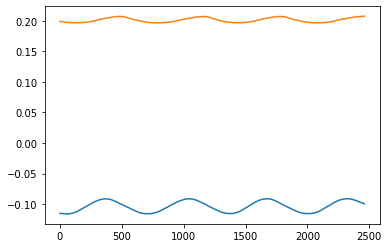

In [16]:
plt.plot(magy)
plt.plot(magx)

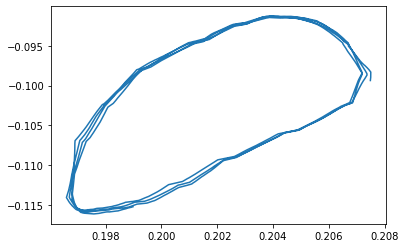

In [17]:
plt.plot(magx,magy)

Hard Iron Effect

In [18]:
offset_x = (max(magx)+min(magx))/2
offset_y = (max(magy)+min(magy))/2
magx_soft = magx-offset_x
magy_soft = magy-offset_y

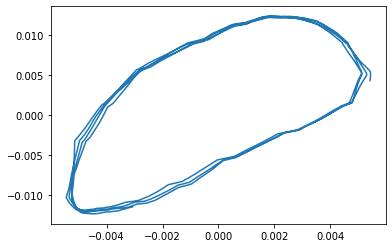

In [19]:
plt.plot(magx_soft,magy_soft)

Soft Iron Effect

In [20]:
magxy = np.zeros((2,len(magx)))
magxy[0] = magx_soft
magxy[1] = magy_soft

In [21]:
r = np.sqrt((magx_soft)**2+(magy_soft)**2)
m_v,m_i = min(r), np.argmin(r)
r_v,r_i = max(r), np.argmax(r)

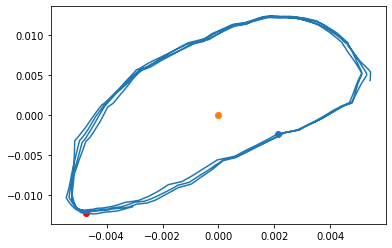

In [22]:
plt.plot(magx_soft,magy_soft)
plt.scatter(magx_soft[r_i],magy_soft[r_i], c='r')
plt.scatter(magx_soft[m_i],magy_soft[m_i])
plt.scatter(0,0)


In [23]:
theta = np.arcsin(magy_soft[r_i]/r_v)
R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
magxy_soft_iron = np.matmul(R,magxy)

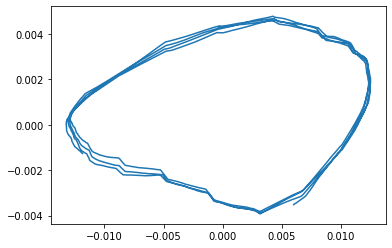

In [24]:
plt.plot(magxy_soft_iron[0], magxy_soft_iron[1])

In [25]:
scale_factor = m_v/r_v
magxy_soft_iron[0]= magxy_soft_iron[0]* scale_factor
theta = -theta
R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
magxy_soft_iron = np.matmul(R,magxy_soft_iron)

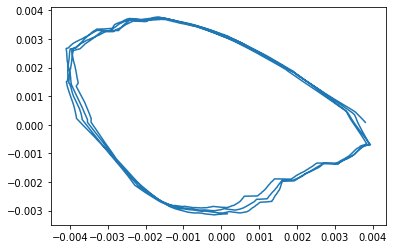

In [26]:
plt.plot(magxy_soft_iron[0], magxy_soft_iron[1])

## removing soft and hard iron from all data

In [27]:
mag_df

Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0      1.646329e+09       24641                  0                   0   
1      1.646329e+09       24642                  0                   0   
2      1.646329e+09       24643                  0                   0   
3      1.646329e+09       24644                  0                   0   
4      1.646329e+09       24645                  0                   0   
...             ...         ...                ...                 ...   
41702  1.646330e+09       66343                  0                   0   
41703  1.646330e+09       66344                  0                   0   
41704  1.646330e+09       66345                  0                   0   
41705  1.646330e+09       66346                  0                   0   
41706  1.646330e+09       66347                  0                   0   

       header.frame_id  magnetic_field.x  magnetic_field.y  magnetic_field.z  \
0                  NaN          0.000019         -0.000010          0.000024   
1                  NaN          0.000019         -0.000010          0.000024   
2                  NaN          0.000019         -0.000010          0.000024   
3                  NaN          0.000019         -0.000010          0.000024   
4                  NaN          0.000019         -0.000010          0.000024   
...                ...               ...               ...               ...   
41702              NaN          0.000020         -0.000011          0.000025   
41703              NaN          0.000020         -0.000011          0.000025   
41704              NaN          0.000020         -0.000011          0.000025   
41705              NaN          0.000020         -0.000011          0.000025   
41706              NaN          0.000020         -0.000011          0.000025   

       magnetic_field_covariance_0  magnetic_field_covariance_1  \
0                              0.0                          0.0   
1                              0.0                          0.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          0.0   
...                            ...                          ...   
41702                          0.0                          0.0   
41703                          0.0                          0.0   
41704                          0.0                          0.0   
41705                          0.0                          0.0   
41706                          0.0                          0.0   

       magnetic_field_covariance_2  magnetic_field_covariance_3  \
0                              0.0                          0.0   
1                              0.0                          0.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          0.0   
...                            ...                          ...   
41702                          0.0                          0.0   
41703                          0.0                          0.0   
41704                          0.0                          0.0   
41705                          0.0                          0.0   
41706                          0.0                          0.0   

       magnetic_field_covariance_4  magnetic_field_covariance_5  \
0                              0.0                          0.0   
1                              0.0                          0.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          0.0   
...                            ...                          ...   
41702                          0.0                          0.0   
41703              

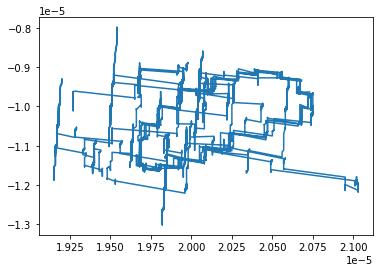

In [28]:
plt.plot(mag_df['magnetic_field.x'],mag_df['magnetic_field.y'])

In [29]:
# remove hard iron
real_magx = (np.array(mag_df['magnetic_field.x'])*10000)-offset_x
real_magy = (np.array(mag_df['magnetic_field.y'])*10000)-offset_y
# remove soft iron

real_magxy = np.zeros((2,len(real_magx)))
real_magxy[0] = real_magx
real_magxy[1] = real_magy
real_magxy1 = np.matmul(R,real_magxy)

real_magxy[0]= real_magxy[0]* scale_factor
real_magxy = np.matmul(-R,real_magxy)

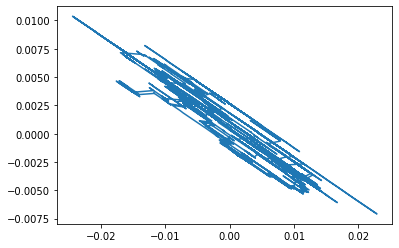

In [30]:
plt.plot(real_magxy[0],real_magxy[1])

# Yaw Angle Estimation

In [31]:
real_magxy.shape

(2, 41707)

In [32]:
yaw_mag = np.arctan2(real_magxy[1],real_magxy[0])* 180 / np.pi

In [33]:
t = imu_df['Time']
eluer_angle = np.zeros((len(t),3))
for i in range(len(t)):
  w = imu_df['orientation.w'][i]
  x = imu_df['orientation.x'][i]
  y = imu_df['orientation.y'][i]
  z = imu_df['orientation.z'][i]
  q = Quaternion(w,x,y,z)
  e = q.to_euler()
  eluer_angle[i,:] = e
  i = i+1

In [34]:
yaw_angle_sensor = eluer_angle[:,2]* 180 / np.pi

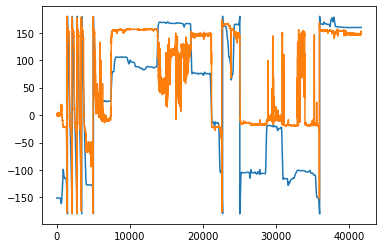

In [35]:
plt.plot(yaw_angle_sensor)
plt.plot(yaw_mag)

plt.rcParams['figure.figsize'] = [50, 8]

# yaw rate 

In [36]:
yaw_rate_wz = imu_df['angular_velocity.z']
t = imu_df['Time']
yaw_angle = cumtrapz(yaw_rate_wz,t)*180 / np.pi

In [37]:
yaw_angle = yaw_angle+yaw_angle_sensor[0]

In [38]:
#reduce the angle  
angle =  yaw_angle % 360 

#force it to be the positive remainder, so that 0 <= angle < 360  
angle = (angle + 360) % 360

#force into the minimum absolute value residue class, so that -180 < angle <= 180  
for i in range(len(yaw_angle)):
  if angle[i] > 180: 
    angle[i] -= 360

yaw_imu = angle

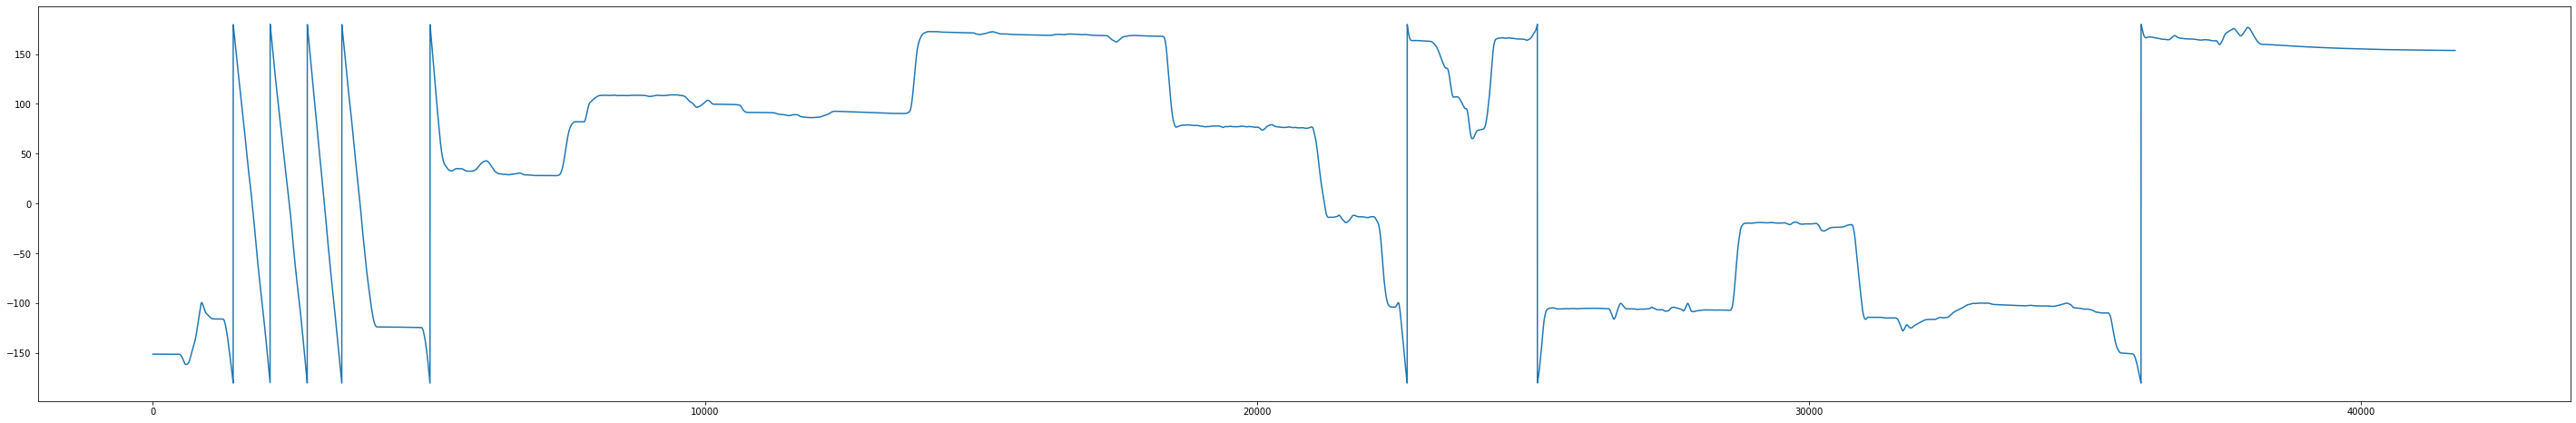

In [39]:
plt.plot(yaw_imu)

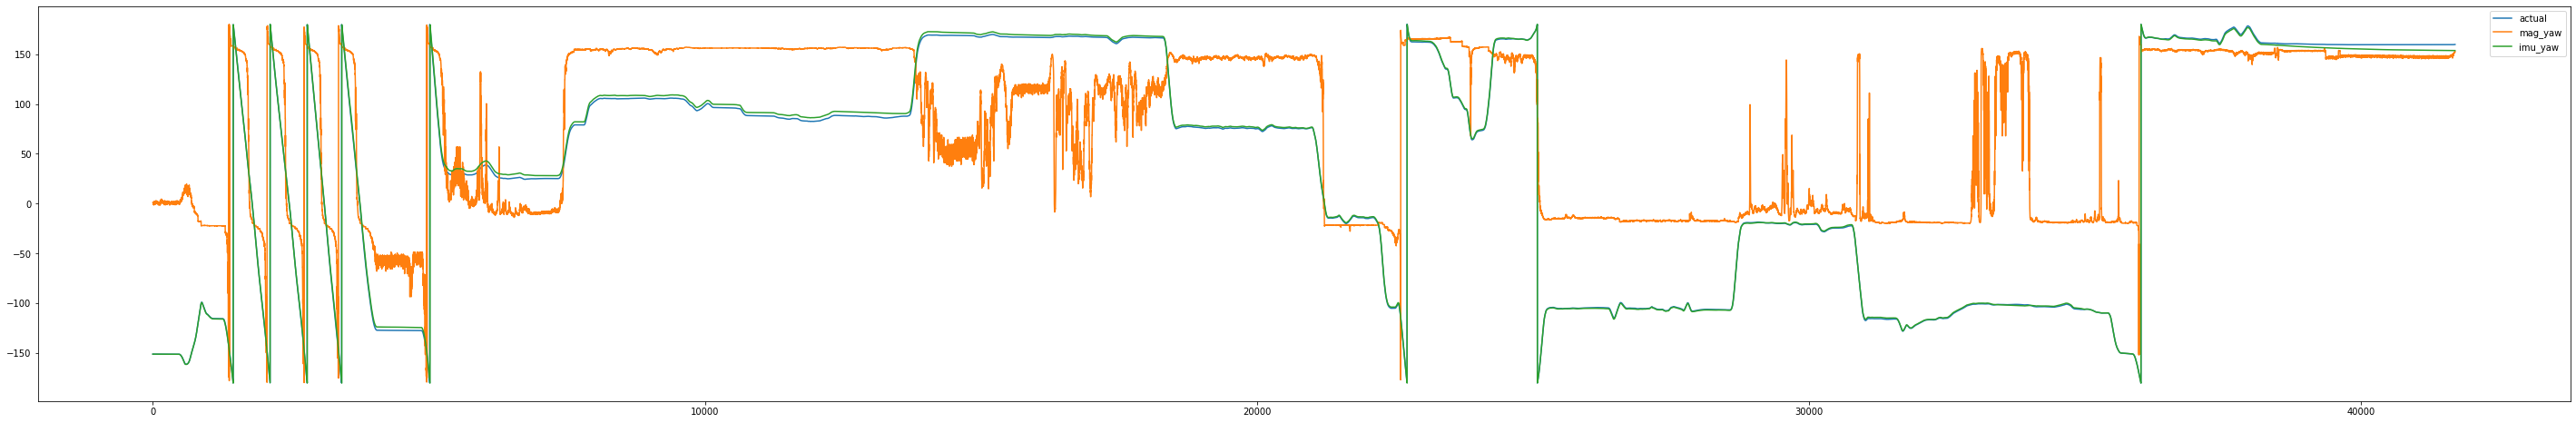

In [40]:
plt.plot(yaw_angle_sensor, label='actual')
plt.plot(yaw_mag, label='mag_yaw')
plt.plot(yaw_imu, label= 'imu_yaw')
plt.legend()
plt.rcParams['figure.figsize'] = [80, 20]

# complementary filter for yaw estimation

In [41]:
a = 0.9
comp_filter_yaw = (yaw_imu*a)+(yaw_mag*(1-a))

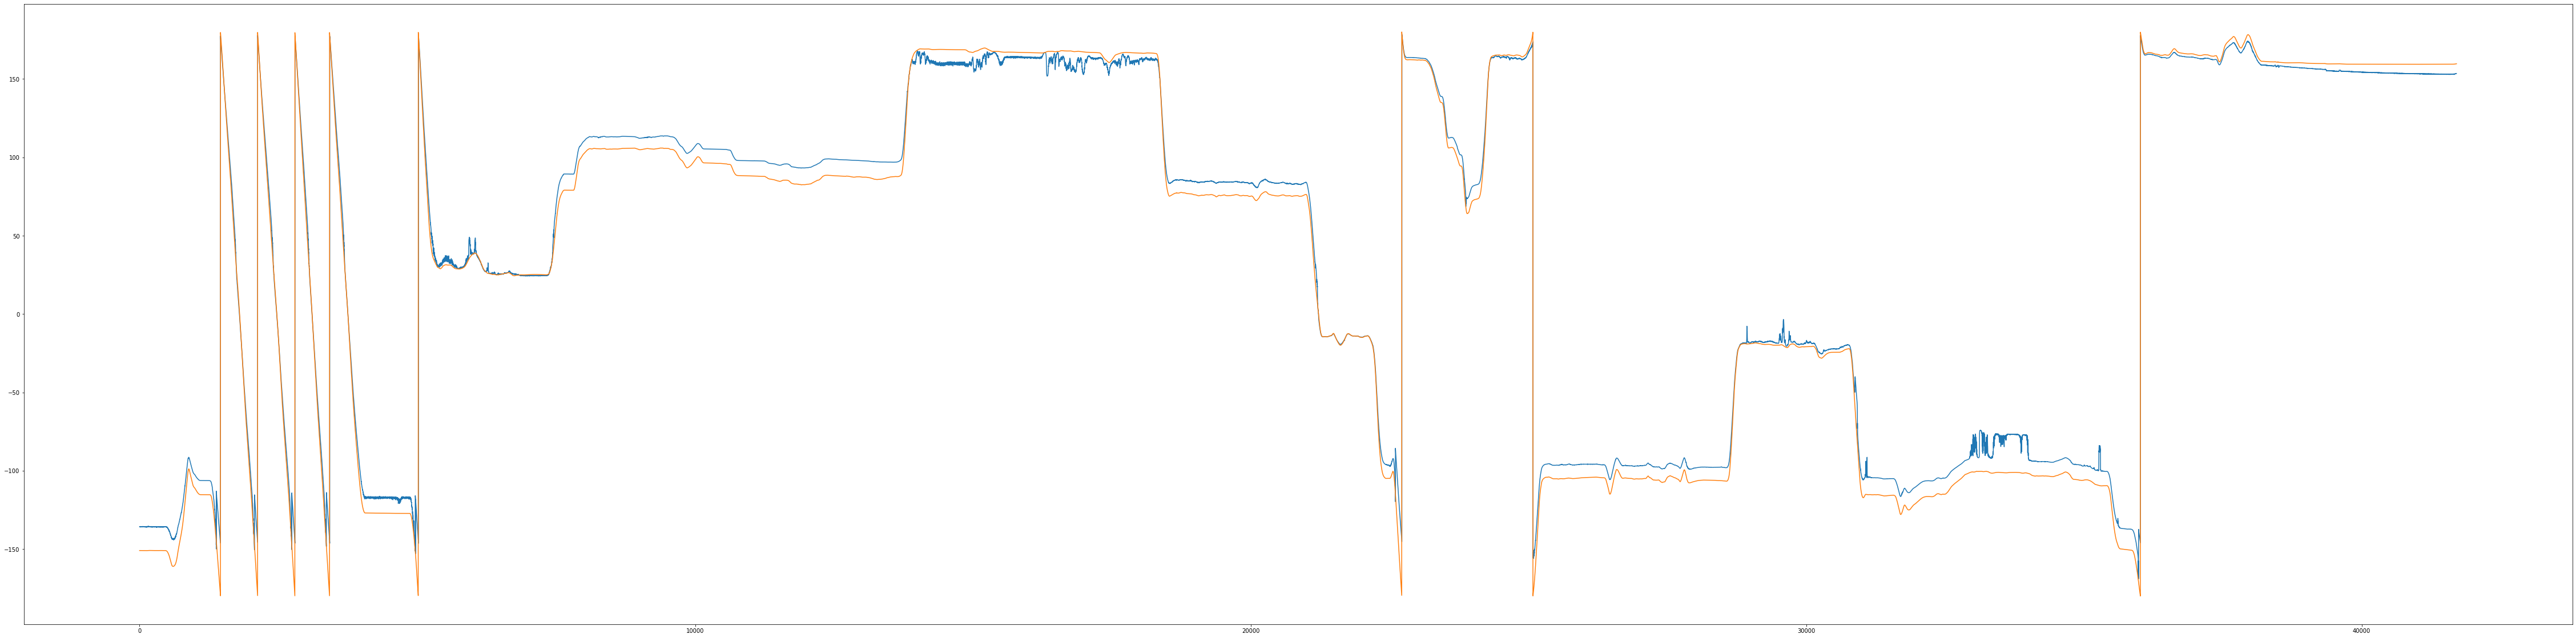

In [42]:
plt.plot(comp_filter_yaw)
plt.plot(yaw_angle_sensor)

#Forward Velocity 

In [43]:
utm_east = np.array(gps_df['utm_easting'])
utm_north = np.array(gps_df['utm_northing'])
gps_t = np.array(gps_df['Time'])


In [44]:
gps_velocity = np.zeros((len(gps_t)))
gps_vx = np.zeros((len(gps_t)))
gps_vy = np.zeros((len(gps_t)))
for i in range(len(gps_t)-1):
  x,y = utm_east[i+1]-utm_east[i],utm_north[i+1]-utm_north[i]
  dt = (gps_t[i+1]-gps_t[i])
  gps_velocity[i] = np.sqrt(x**2+y**2)/dt
  gps_vx[i] = x/dt
  gps_vy[i] = y/dt

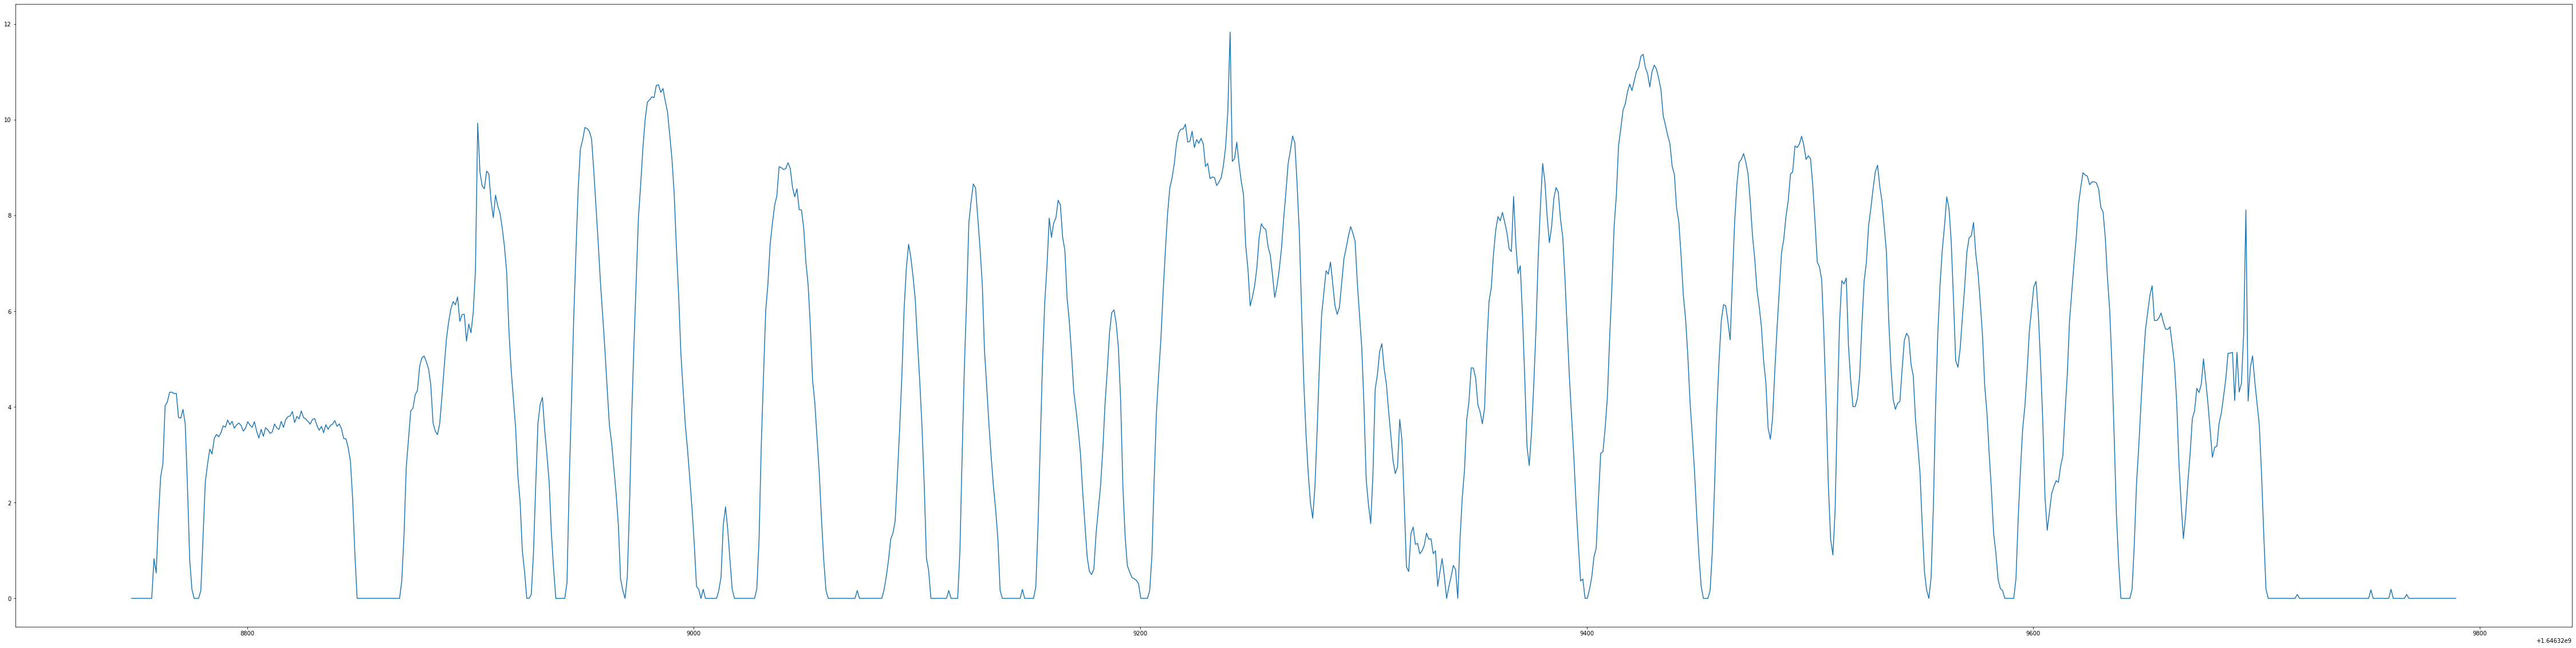

In [45]:
plt.plot(gps_t,gps_velocity)


In [46]:
max(gps_t)

1646329789.2089584

In [47]:
vel_df = imu_df[['linear_acceleration.x','linear_acceleration.y','linear_acceleration.z','Time']]

In [48]:
ax = vel_df['linear_acceleration.x']
ay = vel_df['linear_acceleration.y']
az = vel_df['linear_acceleration.z']
imu_t = np.array(vel_df['Time'])
ax = np.array(ax)
ay = np.array(ay)
#ax = ax.clip(lower=0, upper=3)
#ay = ay.clip(lower=0, upper=3)

In [49]:
len(ax)

41708

In [50]:
len(ax)

41708

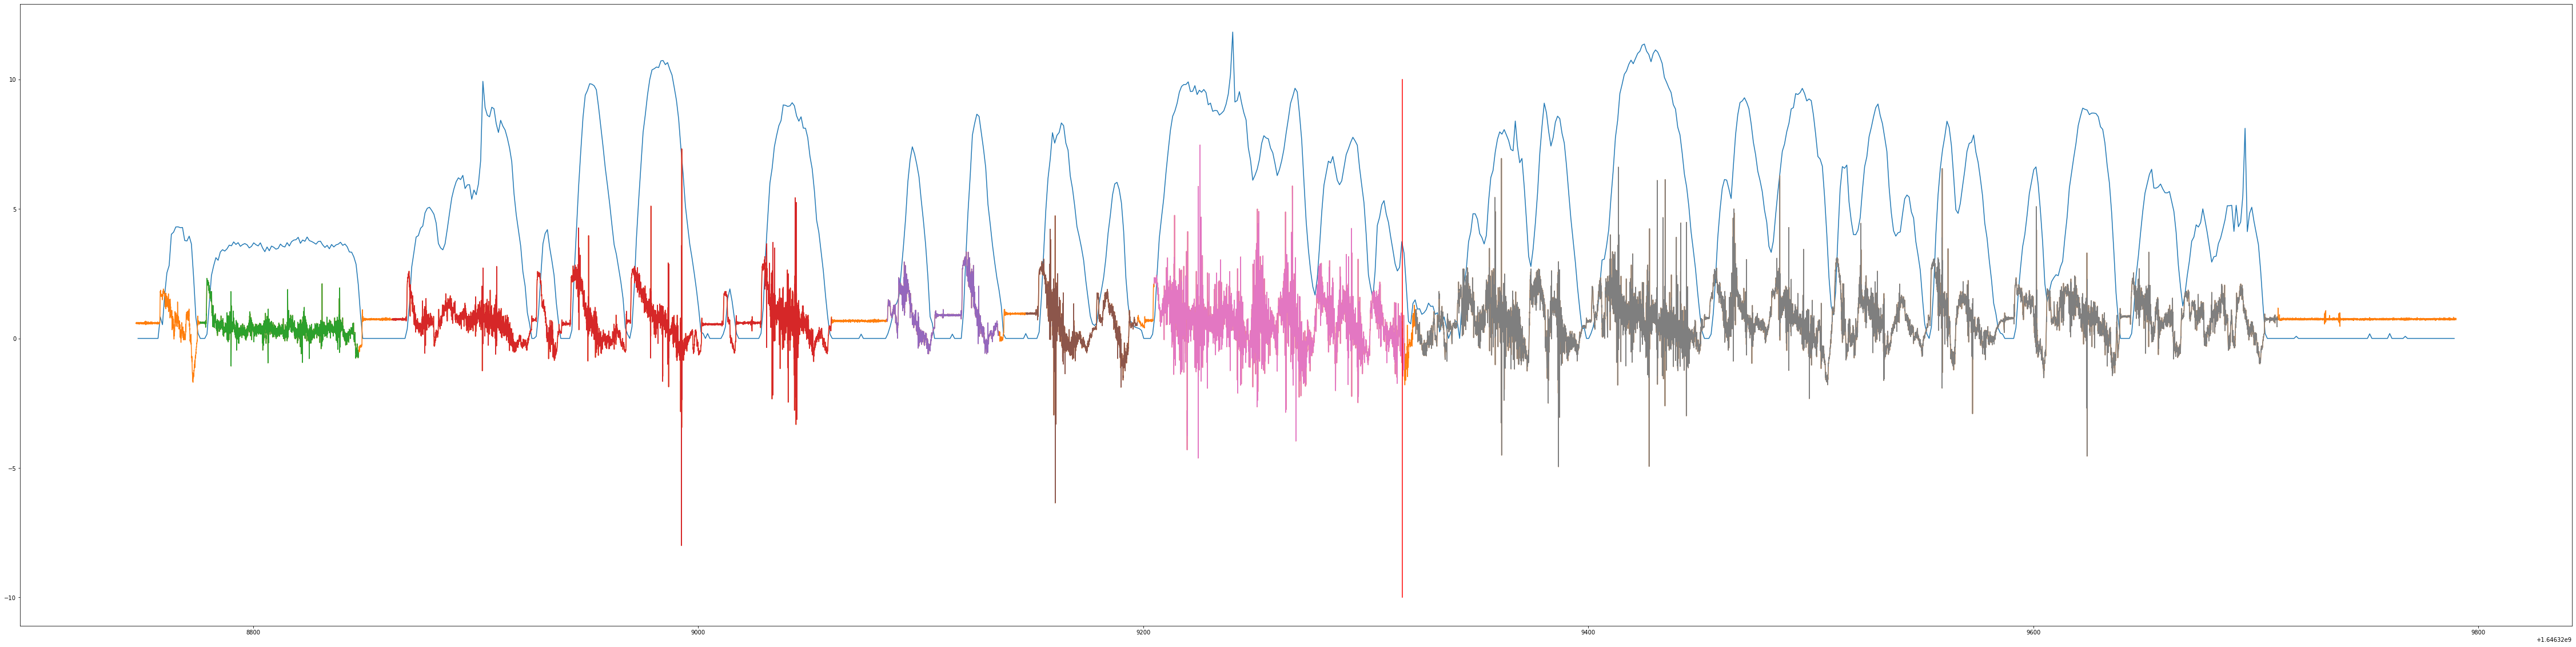

In [51]:
tc = 1646329316.5
plt.plot(gps_t,gps_velocity)
plt.plot(imu_t,ax)
plt.plot(imu_t[1150:4000],ax[1150:4000])
plt.plot(imu_t[4600:12500],ax[4600:12500])
plt.plot(imu_t[13500:15500],ax[13500:15500])
plt.plot(imu_t[16000:18000],ax[16000:18000])
plt.plot(imu_t[18300:22800],ax[18300:22800])
plt.plot(imu_t[23000:38500],ax[23000:38500])
plt.plot(np.array([1,1,1])*tc,[10,0,-10],c='r')



In [52]:
len(ax)

41708

In [53]:
vx =  np.zeros((len(ax)))
vx[1150:4000-1] = cumtrapz(ax[1150:4000]-np.mean(ax[1150:4000]),imu_t[1150:4000])
vx[4600:12500-1] = cumtrapz(ax[4600:12500]-np.mean(ax[4600:12500]),imu_t[4600:12500])
vx[13500:15500-1] = cumtrapz(ax[13500:15500]-np.mean(ax[13500:15500]),imu_t[13500:15500])
vx[16000:18000-1] = cumtrapz(ax[16000:18000]-np.mean(ax[16000:18000]),imu_t[16000:18000])
vx[18000:22800-1] = cumtrapz(ax[18000:22800]-np.mean(ax[18000:22800]),imu_t[18000:22800])
vx[23500:30500-1] = cumtrapz(ax[23500:30500]-np.mean(ax[23500:30500]),imu_t[23500:30500])
vx[30500:38500-1] = cumtrapz(ax[30500:38500]-np.mean(ax[30500:38500]),imu_t[30500:38500])


In [54]:
np.mean(ax[23000:38500])

0.7422293548387097

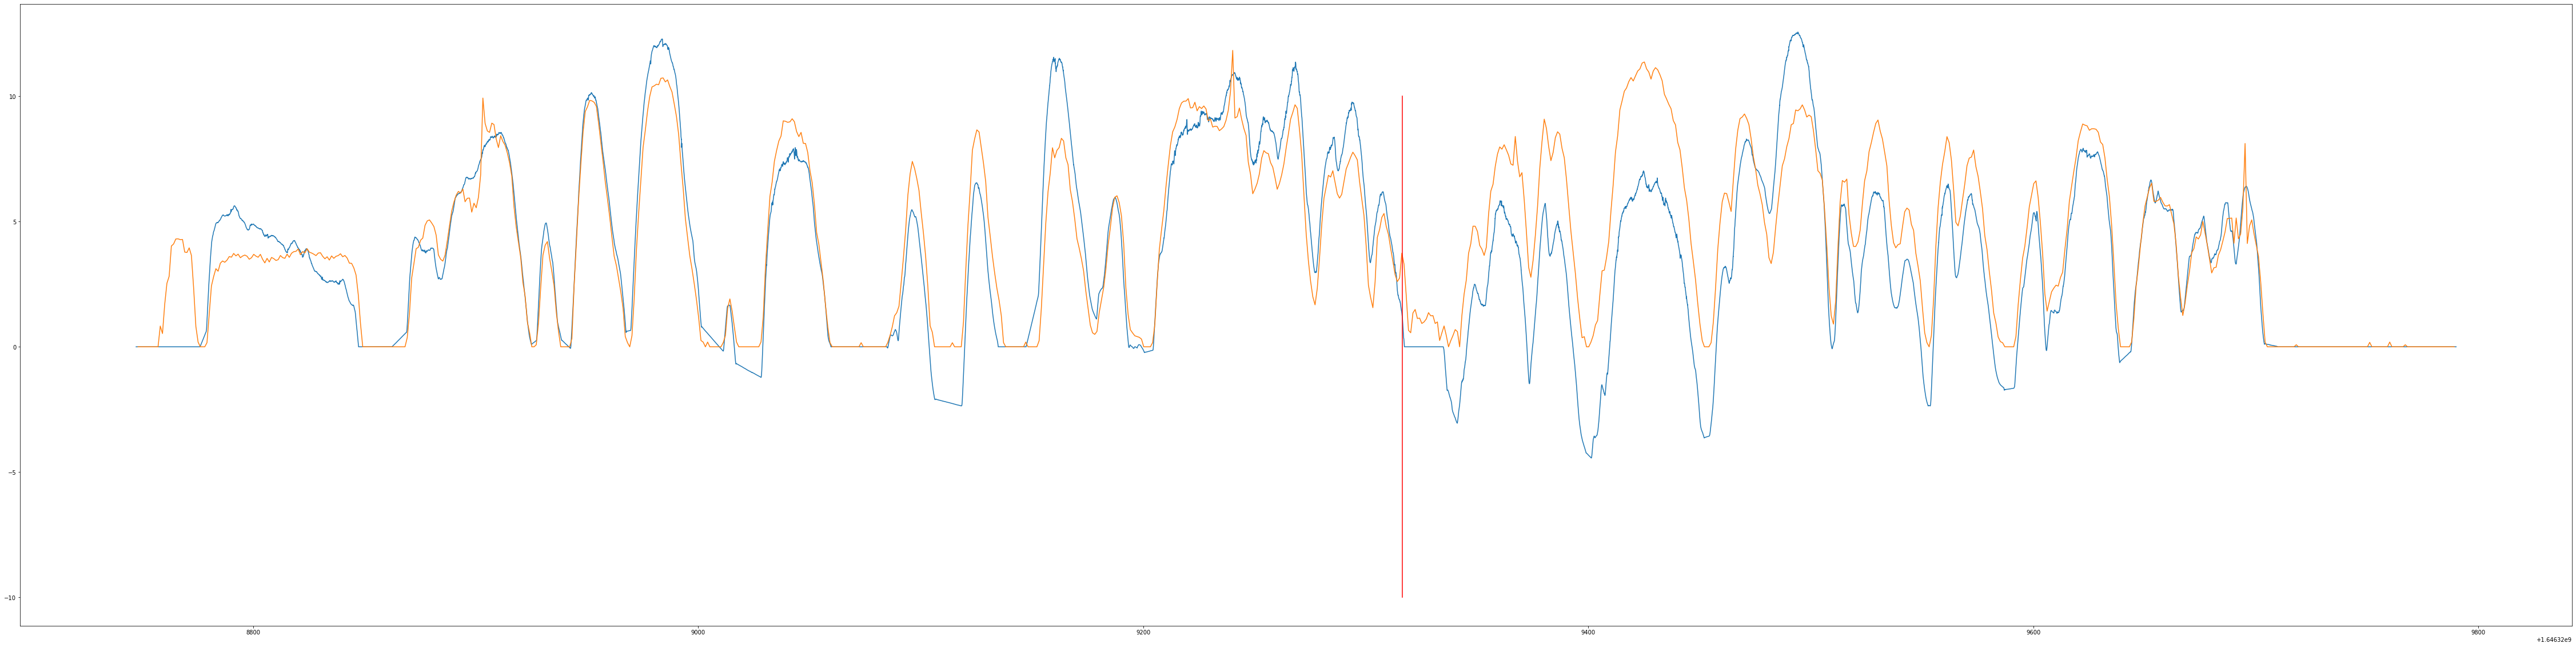

In [55]:
plt.plot(imu_t[0:len(vx)],vx)
plt.plot(gps_t,gps_velocity)
plt.plot(np.array([1,1,1])*tc,[10,0,-10],c='r')


# Dead Reckoning with IMU

In [56]:
yaw_angle_sensor = yaw_imu

In [57]:
w = yaw_rate_wz
v = vx
yaw = yaw_angle_sensor

In [58]:
y_dot_dot = w*v

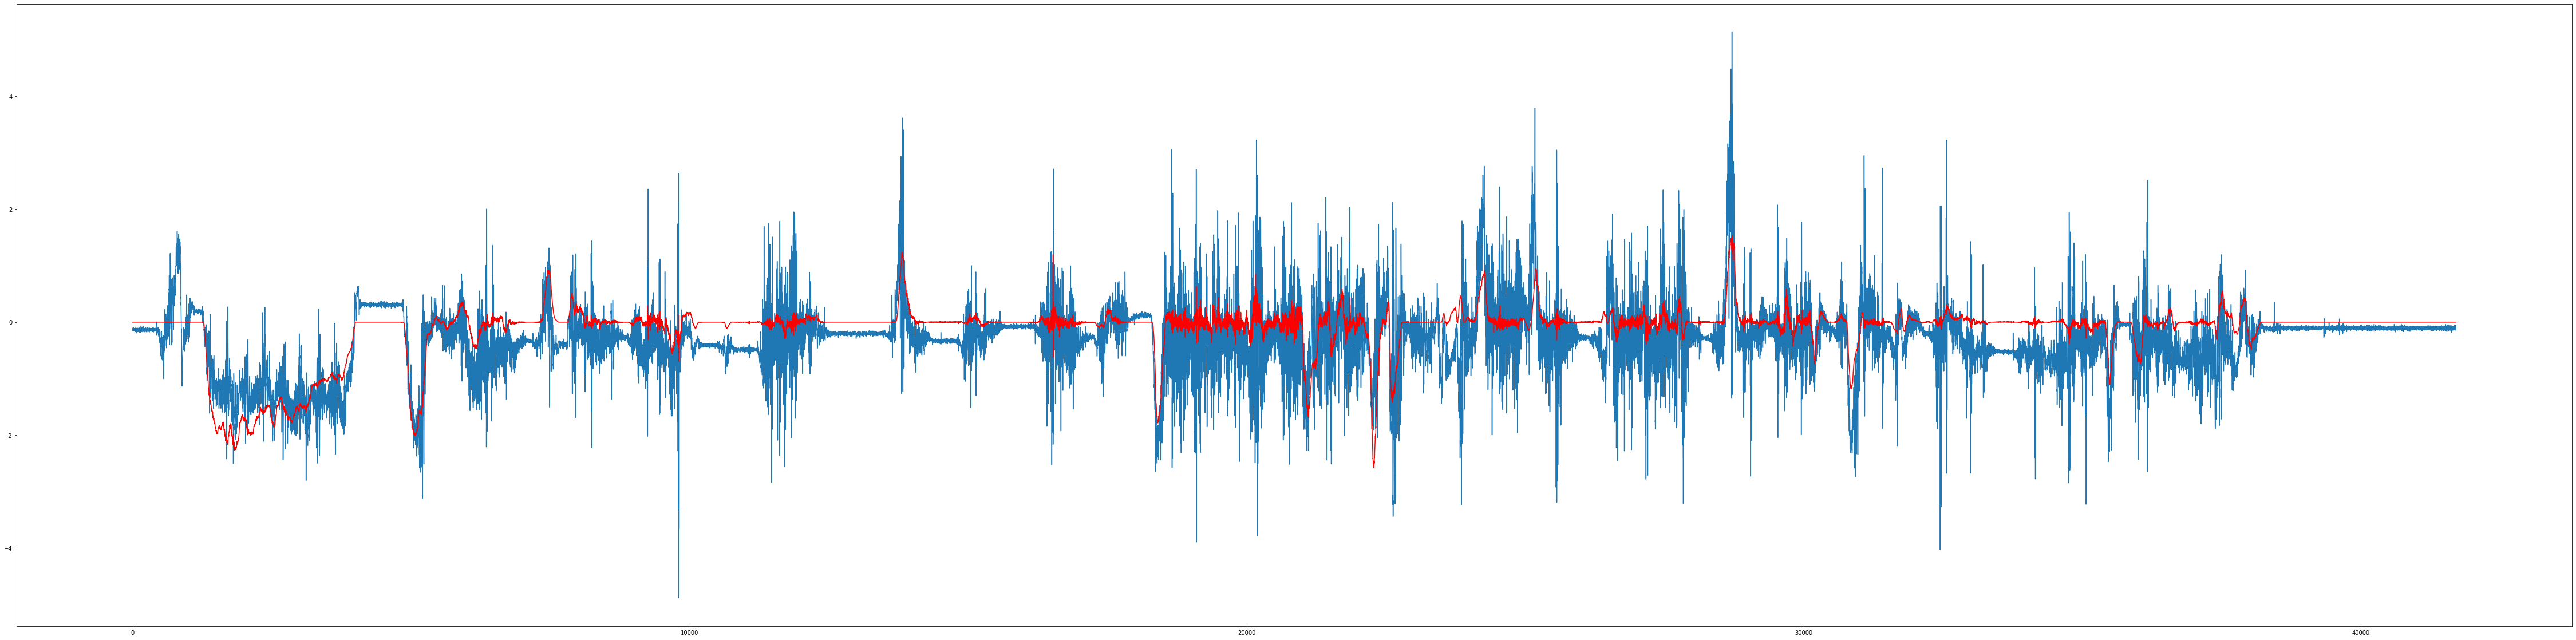

In [59]:
plt.plot(ay)
plt.plot(y_dot_dot,c='r')

In [60]:
tc = 1646329316.5

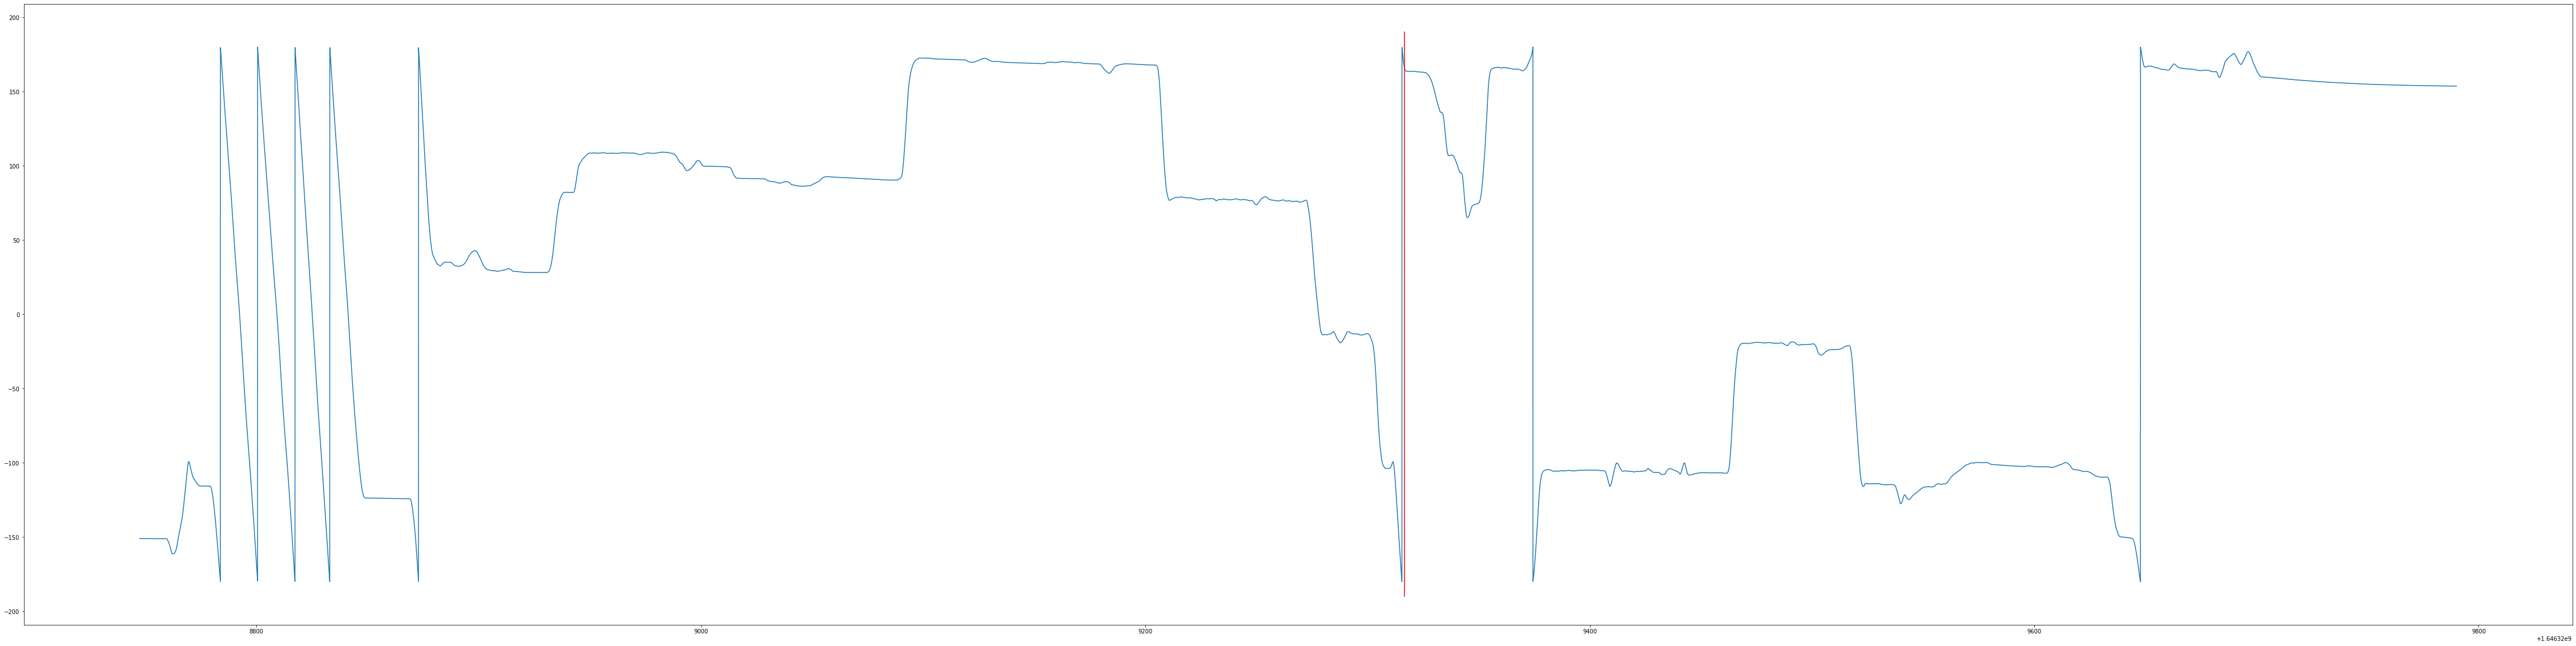

In [61]:
plt.plot(imu_t[0:len(yaw)],yaw)
plt.plot(np.array([1,1,1])*tc,[190,0,-190],c='r')

In [62]:
v_e = v[0:len(yaw)]*np.cos(yaw*np.pi/180)
v_n = v[0:len(yaw)]*np.sin(yaw*np.pi/180)

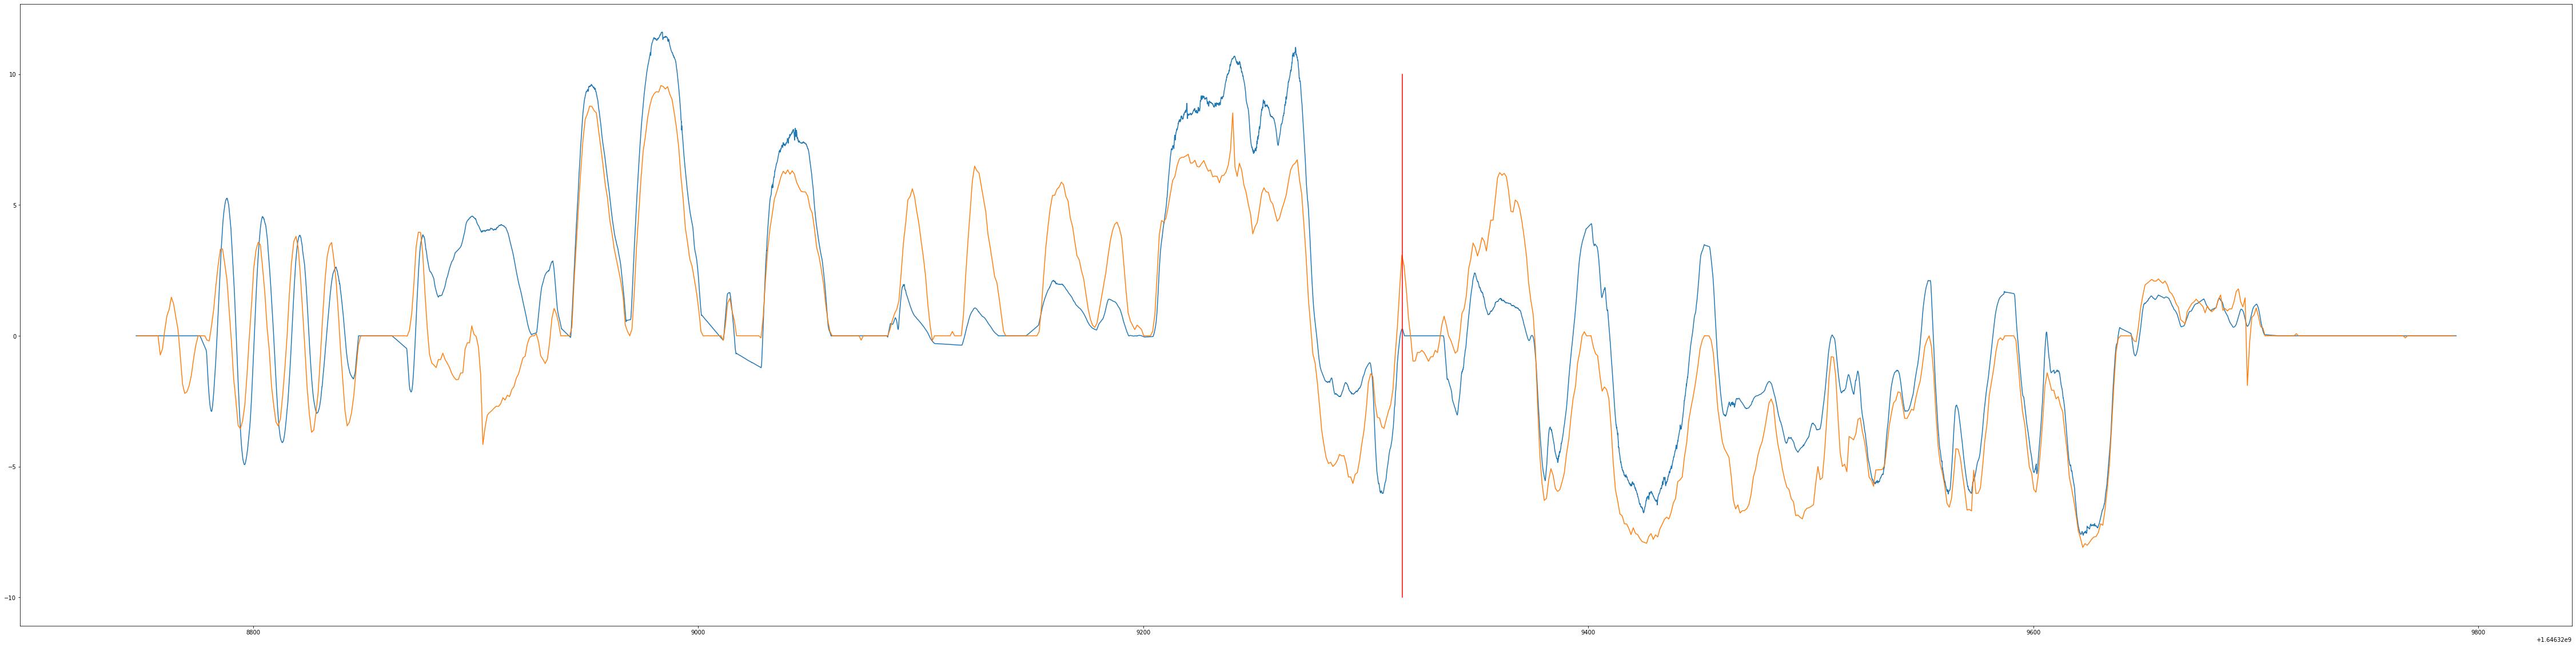

In [63]:
plt.plot(imu_t[0:len(yaw)],v_n)
plt.plot(gps_t,gps_vx)
plt.plot(np.array([1,1,1])*tc,[10,0,-10],c='r')

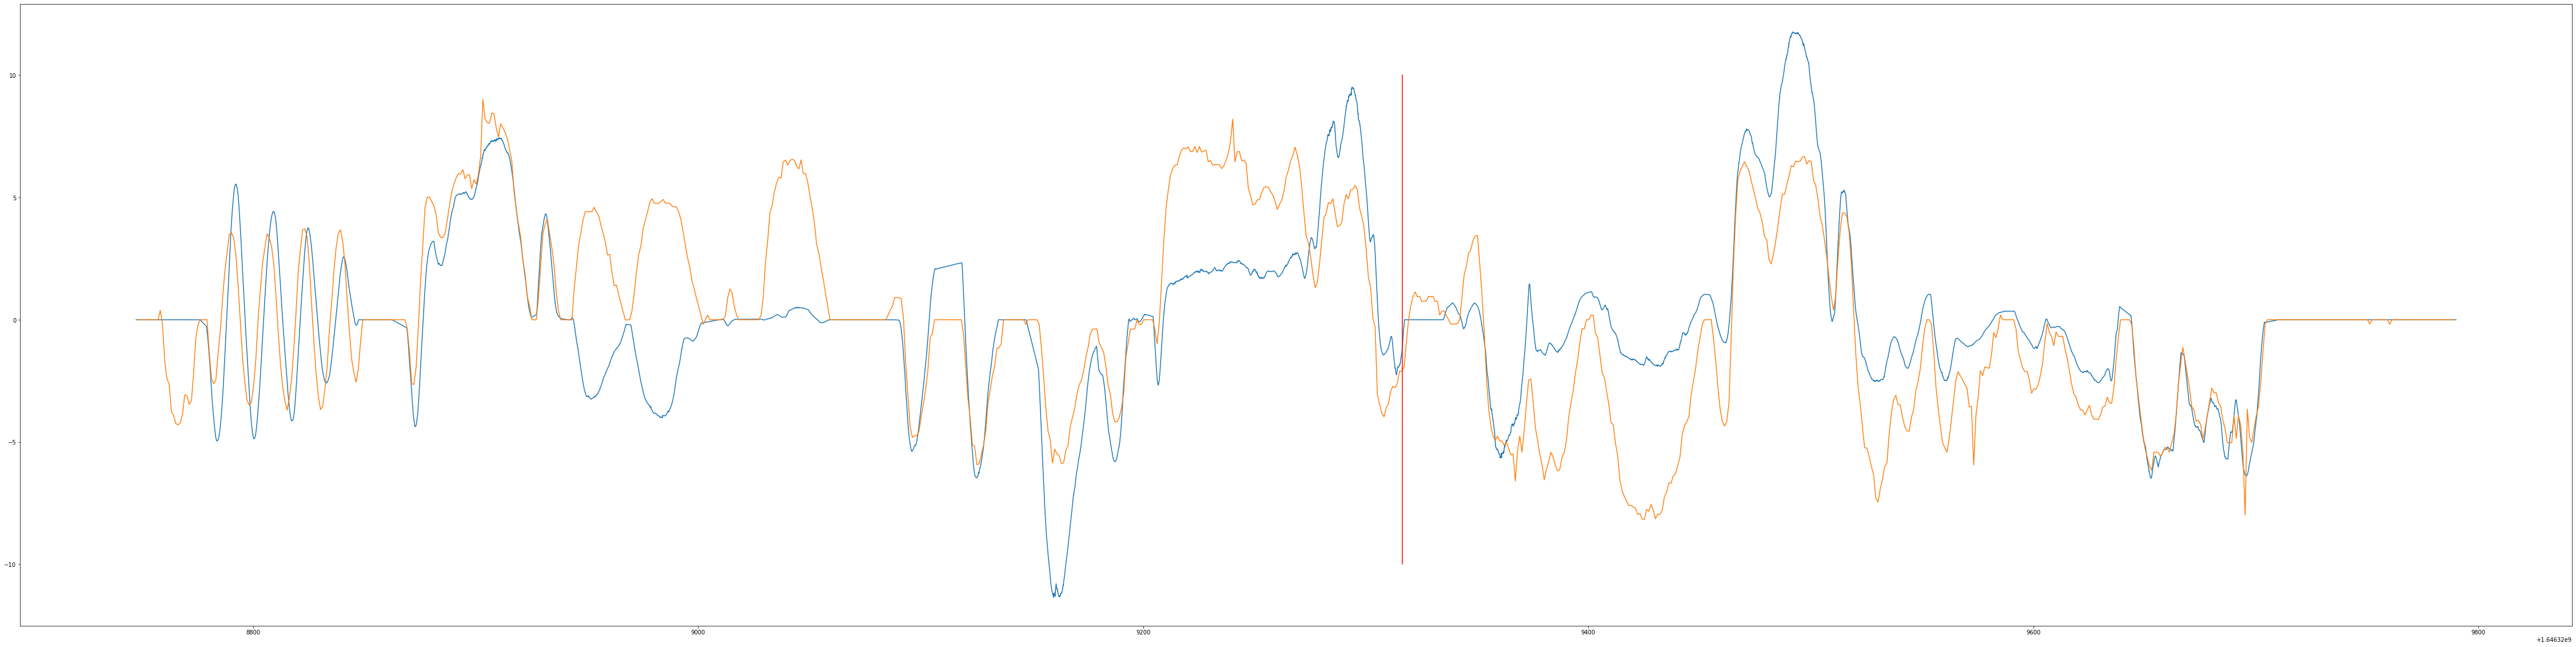

In [64]:
plt.plot(imu_t[0:len(yaw)],v_e)
plt.plot(gps_t,gps_vy)
plt.plot(np.array([1,1,1])*tc,[10,0,-10],c='r')

In [65]:
dt = imu_t[1]-imu_t[0]

In [66]:
dt

0.026488065719604492

In [67]:
x_e = [0]
x_n = [0]
for i in range(len(v_e)):
  dx_e = v_e[i]*dt
  dx_n = v_n[i]*dt
  x_e.append(x_e[i]+dx_e)
  x_n.append(x_n[i]+dx_n)


In [68]:
th = 45 * np.pi/180
R = [[np.cos(th), -np.sin(th)],[np.sin(th),np.cos(th)]]
R = np.array(R)
scale = 0.9
imu_trac = np.zeros((2,len(x_e)))
imu_trac[0] = np.array(x_n)
imu_trac[1] = np.array(x_e)
imu_final = np.matmul(R,imu_trac)*scale

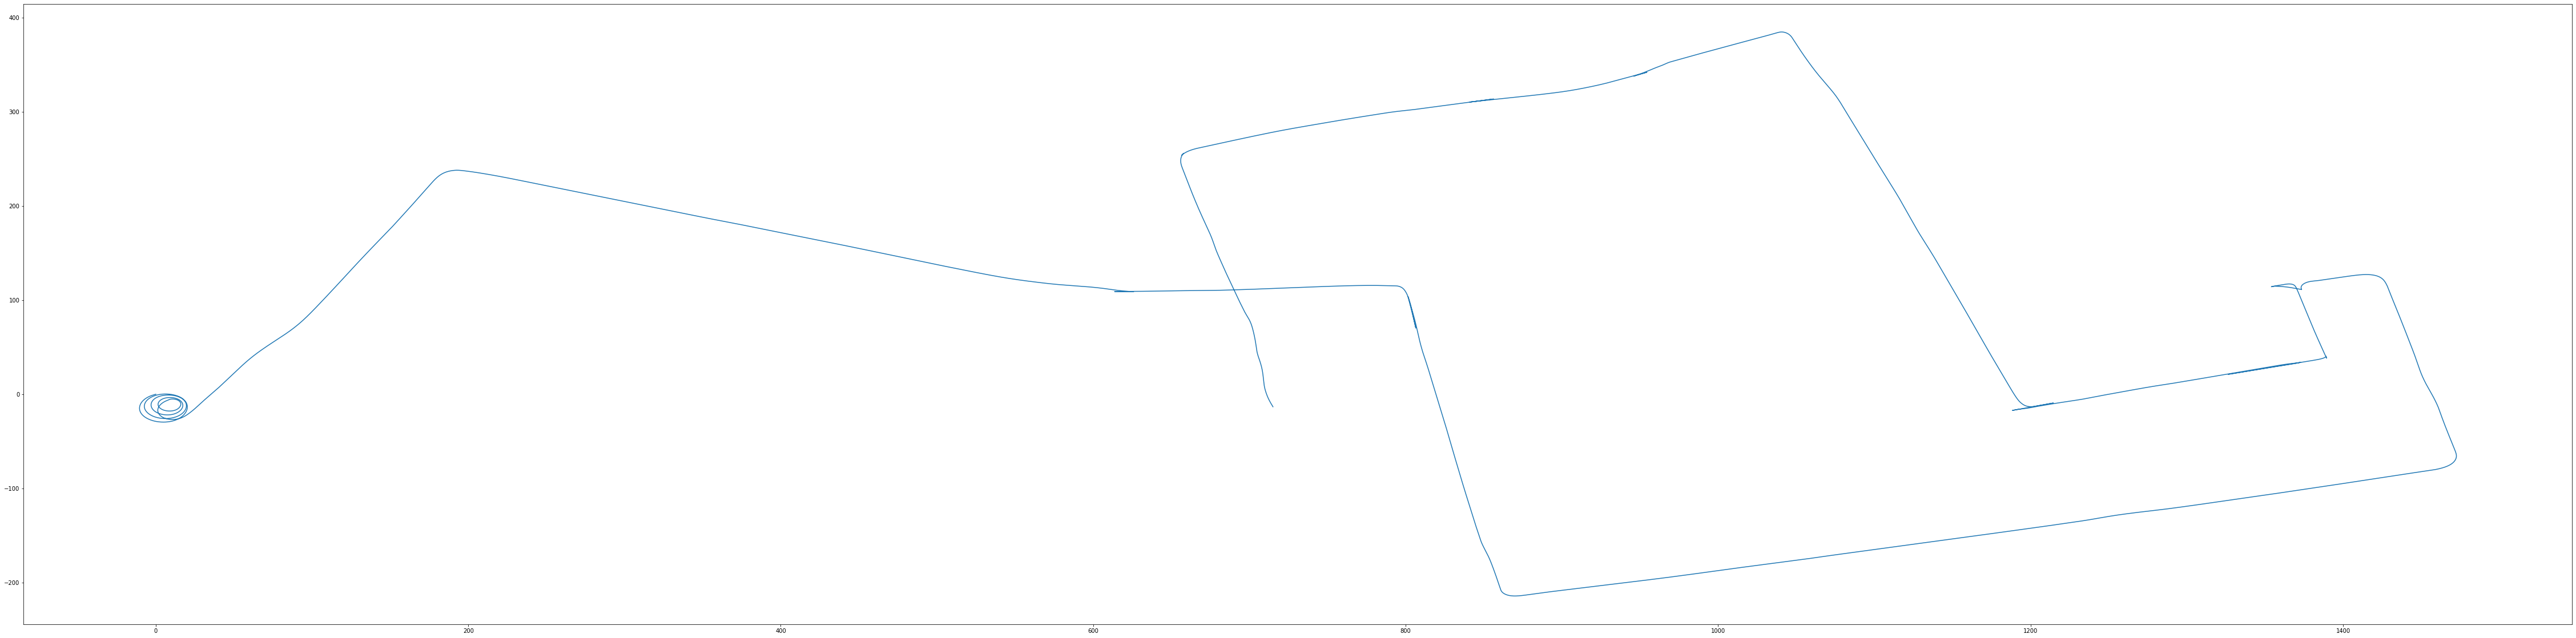

In [69]:
plt.plot(x_n,x_e)

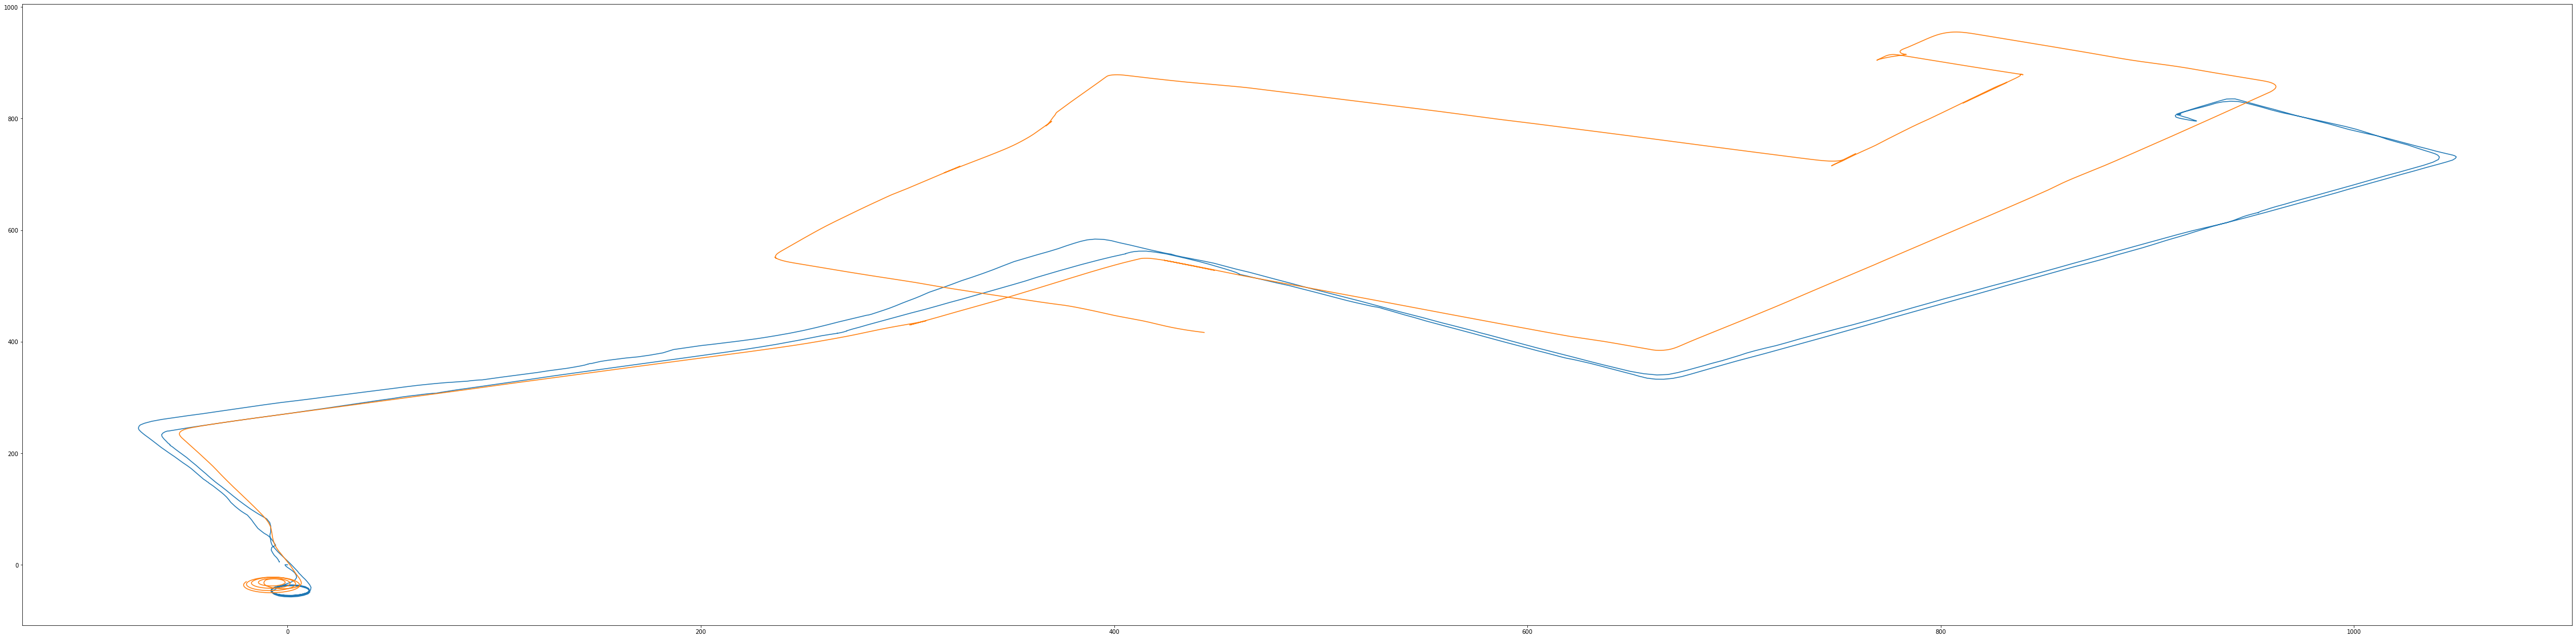

In [70]:
plt.plot(utm_east-utm_east[0],utm_north-utm_north[0])
plt.plot(imu_final[0]-20,imu_final[1]-30)


# Xc Calculation

In [88]:
xc = []
x = ay-y_dot_dot
ang_acc = vx[1:len(vx)]-vx[0:len(vx)-1]
ang_acc = ang_acc*40
for i in range(len(ang_acc)):
  if ang_acc[i] != 0:
    xc.append(x[i]/ang_acc[i])
x_c = np.mean(xc)

In [89]:
x_c

-0.18728600273198118